## Creating visualizations of keyword frequency over time

In [ ]:
import re
import numpy as np
import pandas as pd
from google.colab import drive
from collections import Counter
import matplotlib.pyplot as plt
import ast

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('drive/MyDrive/F24 Research/data/simplified_historical_tweets_no_exclusions.xlsx')
data['identified_keywords'] = data['identified_keywords'].apply(ast.literal_eval)
data.head()

,raw_text,created_at,id,retweet_count,reply_count,like_count,quote_count,bookmark_count,impression_count,account_id,cleaned_text,identified_keywords
0,"As we mourn the loss of Rep. John Lewis, we mu...",2020-07-22 17:54:09,1285996571503529984,1,0,0,0,0,0,1013890285523296258,mourn loss rep john lewis must also recommit a...,[john lewis]
1,This false narrative around voter fraud isn't ...,2020-08-13 19:53:03,1293999023054097920,0,0,1,0,0,0,1013890285523296258,false narrative around voter fraud anything ne...,[civil war]
2,"52 years after his murder, the words, &amp; wi...",2021-01-18 18:01:03,1351228121597554944,1,0,1,0,0,0,1013890285523296258,52 years murder words amp wisdom dr martin lut...,"[martin luther king, dr. king]"
3,Say it loud: I’m BLACK and I’m PROUD! For this...,2021-02-16 16:00:35,1361707051550966016,0,0,0,0,0,0,1013890285523296258,say loud im black im proud black historyblack ...,[black history]
4,"For generations, racial terror has been used a...",2021-03-31 01:37:02,1377072413968630016,1,0,3,0,0,0,1013890285523296258,generations racial terror used weapon keep com...,[racial terror]


In [ ]:
all_keywords = [keyword for sublist in data['identified_keywords'] for keyword in sublist]

keyword_counts = Counter(all_keywords)

top_keywords = keyword_counts.most_common(14)
for keyword, count in top_keywords:
    print(f'{keyword}: {count}')


juneteenth: 831
on this day in: 810
slavery: 669
black history: 555
mlk: 332
martin luther king: 322
slave: 223
enslaved: 204
civil rights movement: 184
lynching: 170
dr. king: 167
today marks: 153
john lewis: 144
bell hooks: 143


In [ ]:
tweets = data.copy()

In [ ]:
replacements = {
    'mlk': 'martin luther king',
    'dr. king': 'martin luther king',
    'enslaved': 'slavery',
    'slave': 'slavery'
}

def replace_keywords(keywords):
    return [replacements[keyword] if keyword in replacements else keyword for keyword in keywords]

# Apply replacements to each row in the 'found_keywords' column
tweets['identified_keywords'] = tweets['identified_keywords'].apply(replace_keywords)

tweets['identified_keywords']

,identified_keywords
0,[john lewis]
1,[civil war]
2,"[martin luther king, martin luther king]"
3,[black history]
4,[racial terror]
...,...
7207,[fannie lou hamer]
7208,"[civil rights leader, bayard rustin]"
7209,[bell hooks]
7210,"[charles jones, diane nash, charles sherrod]"


In [ ]:
all_keywords = [keyword for identified_keyword_list in tweets['identified_keywords'] for keyword in identified_keyword_list]

keyword_counts = sorted(Counter(all_keywords).items(), key=lambda x: -x[1])

keywords_to_drop = [keyword_count for keyword_count in keyword_counts if 'day' in keyword_count[0] or 'years' in keyword_count[0] or bool(re.search(r'\b\d{4}\b', keyword_count[0]))]

keywords_to_drop_set = set(keywords_to_drop)

keyword_counts = [keyword_count for keyword_count in keyword_counts if keyword_count not in keywords_to_drop_set]

def top_n_keywords(n):
  return [x[0] for x in keyword_counts[:n]]

def top_m_to_n_keywords(m,n):
  return [x[0] for x in keyword_counts[m:n]]

top_keywords = keyword_counts[:14]
for keyword, count in top_keywords:
    print(f'{keyword}: {count}')

slavery: 1096
juneteenth: 831
martin luther king: 821
black history: 555
civil rights movement: 184
lynching: 170
john lewis: 144
bell hooks: 143
black panther: 138
jim crow: 138
malcolm x: 104
mutulu shakur: 97
emmett till: 84
racial terror: 72


In [ ]:
tweets = tweets.copy()
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets['year'] = tweets['created_at'].dt.year
tweets['month'] = tweets['created_at'].dt.month
tweets.head()


,raw_text,created_at,id,retweet_count,reply_count,like_count,quote_count,bookmark_count,impression_count,account_id,cleaned_text,identified_keywords,year,month
0,"As we mourn the loss of Rep. John Lewis, we mu...",2020-07-22 17:54:09,1285996571503529984,1,0,0,0,0,0,1013890285523296258,mourn loss rep john lewis must also recommit a...,[john lewis],2020,7
1,This false narrative around voter fraud isn't ...,2020-08-13 19:53:03,1293999023054097920,0,0,1,0,0,0,1013890285523296258,false narrative around voter fraud anything ne...,[civil war],2020,8
2,"52 years after his murder, the words, &amp; wi...",2021-01-18 18:01:03,1351228121597554944,1,0,1,0,0,0,1013890285523296258,52 years murder words amp wisdom dr martin lut...,"[martin luther king, martin luther king]",2021,1
3,Say it loud: I’m BLACK and I’m PROUD! For this...,2021-02-16 16:00:35,1361707051550966016,0,0,0,0,0,0,1013890285523296258,say loud im black im proud black historyblack ...,[black history],2021,2
4,"For generations, racial terror has been used a...",2021-03-31 01:37:02,1377072413968630016,1,0,3,0,0,0,1013890285523296258,generations racial terror used weapon keep com...,[racial terror],2021,3


In [ ]:
years = set(tweets['year'])

keyword_count_monthly_rows = []

for year in years:
    tweets_for_year = tweets[tweets['year'] == year]
    months = set(tweets_for_year['month'])

    for month in months:
        tweets_for_month_in_year = tweets_for_year[tweets_for_year['month'] == month]

        keywords = [keyword for identified_keywords_list in tweets_for_month_in_year['identified_keywords'] for keyword in identified_keywords_list]

        for keyword in set(keywords):
            count = keywords.count(keyword)
            date = pd.to_datetime(f'{year}-{month}-01')
            date = pd.to_datetime(f'{year}-{month:02d}')

            keyword_count_monthly_rows.append({
                'year': year,
                'month': month,
                'keyword': keyword,
                'count': count,
                'date': date
            })

keyword_count_monthly = pd.DataFrame(keyword_count_monthly_rows)

keyword_count_monthly = keyword_count_monthly.sort_values(by=['date', 'count'], ascending=[True, False])

keyword_count_monthly = keyword_count_monthly.reset_index(drop=True)

keyword_count_monthly

,year,month,keyword,count,date
0,2020,5,on this day in,8,2020-05-01
1,2020,5,black wall street,7,2020-05-01
2,2020,5,black panther,3,2020-05-01
3,2020,5,slavery,3,2020-05-01
4,2020,5,tulsa race massacre,3,2020-05-01
...,...,...,...,...,...
2168,2023,6,james hood,1,2023-06-01
2169,2023,6,vivian malone,1,2023-06-01
2170,2023,6,nina simone,1,2023-06-01
2171,2023,6,black codes,1,2023-06-01


In [ ]:
years = set(tweets['year'])

keyword_count_monthly_rows = []

for year in years:
    tweets_for_year = tweets[tweets['year'] == year]
    months = set(tweets_for_year['month'])

    for month in months:
        tweets_for_month_in_year = tweets_for_year[tweets_for_year['month'] == month]

        keywords = [keyword for identified_keywords_list in tweets_for_month_in_year['identified_keywords'] for keyword in identified_keywords_list]

        for keyword in set(keywords):
            count = keywords.count(keyword)
            date = pd.Period(year=year, month=month, freq='M')

            keyword_count_monthly_rows.append({
                'year': year,
                'month': month,
                'keyword': keyword,
                'count': count,
                'date': date
            })

keyword_count_monthly = pd.DataFrame(keyword_count_monthly_rows)

keyword_count_monthly['date'] = pd.PeriodIndex(keyword_count_monthly['date'], freq='M')

keyword_count_monthly = keyword_count_monthly.set_index('date')

keyword_count_monthly = keyword_count_monthly.sort_values(by=['date', 'count'], ascending=[True, False])

keyword_count_monthly = keyword_count_monthly.reset_index(drop=False)

keyword_count_monthly

,date,year,month,keyword,count
0,2020-05,2020,5,on this day in,8
1,2020-05,2020,5,black wall street,7
2,2020-05,2020,5,black panther,3
3,2020-05,2020,5,slavery,3
4,2020-05,2020,5,tulsa race massacre,3
...,...,...,...,...,...
2168,2023-06,2023,6,james hood,1
2169,2023-06,2023,6,vivian malone,1
2170,2023-06,2023,6,nina simone,1
2171,2023-06,2023,6,black codes,1


In [ ]:
def plot_given_keywords(keywords,ax=plt):
  for keyword in keywords:
    keyword_data = keyword_count_monthly[keyword_count_monthly['keyword'] == keyword]
    keyword_data = keyword_data.sort_values('date')
    dates = [str(x) for x in keyword_data['date']]
    ax.plot(dates, keyword_data['count'], label=keyword, marker='o')

In [ ]:
import matplotlib.dates as mdates

def plot_given_keywords(keywords, ax=plt):
    for keyword in keywords:
        keyword_data = keyword_count_monthly[keyword_count_monthly['keyword'] == keyword]
        keyword_data = keyword_data.sort_values('date')

        # Ensure 'date' column is in datetime format
        keyword_data['date'] = pd.to_datetime(keyword_data['date'])

        ax.plot(keyword_data['date'], keyword_data['count'], label=keyword, marker='o')

    # Format the x-axis to show dates nicely
    ax.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.gcf().autofmt_xdate()  # Rotate date labels for better readability

In [ ]:
import matplotlib.dates as mdates

def plot_given_keywords(keywords, ax=plt):
    for keyword in keywords:
        keyword_data = keyword_count_monthly[keyword_count_monthly['keyword'] == keyword]
        keyword_data = keyword_data.sort_values('date')

        # Convert 'date' from Period to timestamp if necessary
        if keyword_data['date'].dtype.name == "period[M]":  # Check if dtype is Period
            keyword_data['date'] = keyword_data['date'].dt.to_timestamp()

        ax.plot(keyword_data['date'], keyword_data['count'], label=keyword, marker='o')

    # Format the x-axis to show dates nicely
    ax.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.gcf().autofmt_xdate()  # Rotate date labels for better readability
# plot_given_keywords(top_n_keywords(3+6)[3:])


In [ ]:
# def plot_given_keywords(keywords, ax=plt):
#     for keyword in keywords:
#         keyword_data = keyword_count_monthly[keyword_count_monthly['keyword'] == keyword]

#         # Ensure 'date' is in datetime format and sort
#         if keyword_data['date'].dtype.name not in ['datetime64[ns]', 'datetime64[ns, UTC]']:
#             keyword_data['date'] = pd.to_datetime(keyword_data['date'])

#         keyword_data = keyword_data.sort_values('date')  # Sort by date

#         # Convert sorted dates to strings
#         dates = keyword_data['date'].dt.strftime('%Y-%m-%d')  # Convert to formatted string

#         # Plot the data
#         ax.plot(dates, keyword_data['count'], label=keyword, marker='o')

#     # Enhance plot readability
#     ax.set_ylabel('Number of Tweets')
#     ax.set_xlabel('Date')
#     ax.legend()
#     ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for clarity


In [ ]:
concept_keywords = ['slavery','black history ','lynch','slave ','enslaved']
figure_keywords = ['MLK','al sharpton','Martin Luther King', 'KKK', 'Dr. King','black panther','civil rights leader']
event_keywords = ['juneteenth','voting rights act','civil rights movement']
event_minus_juneteenth = ['voting rights act','civil rights movement']

In [ ]:
# def plot_given_keywords(keywords,ax=plt):
#   all_dates = set()
#   for keyword in keywords:
#     keyword_data = keyword_count_monthly[keyword_count_monthly['keyword'] == keyword]
#     keyword_data = keyword_data.sort_values('date')
#     dates = [str(x) for x in keyword_data['date']]
#     for date in dates:
#       all_dates.add(date)
#     ax.plot(keyword_data['date'].apply(str), keyword_data['count'], label=keyword, marker='o')
#   print(sorted(list(all_dates)))

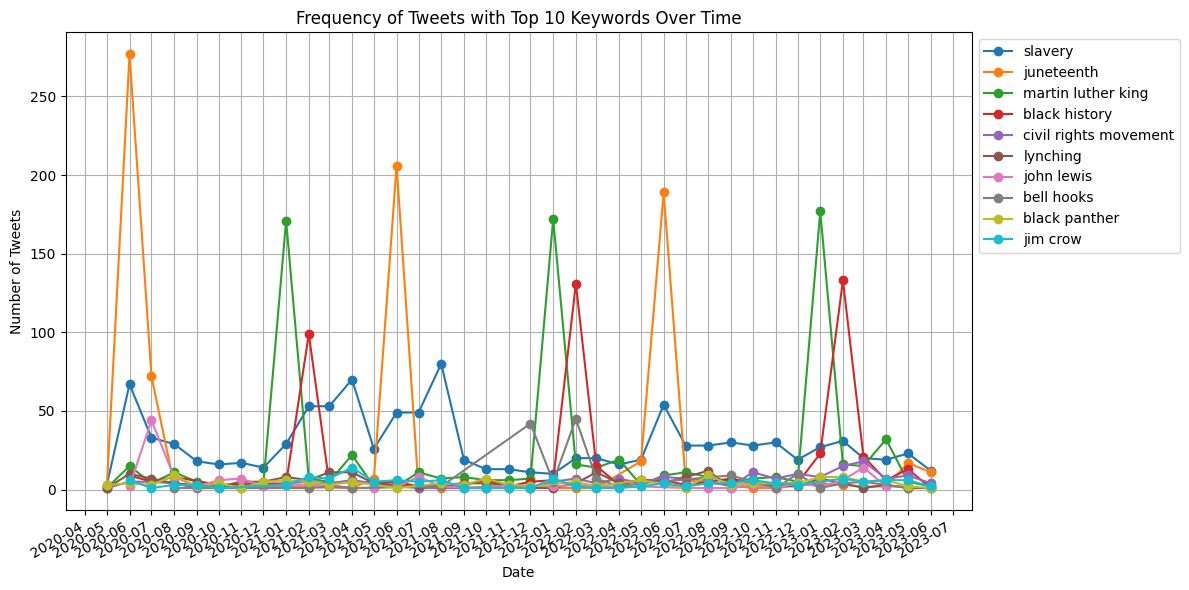

In [ ]:
title = 'Frequency of Tweets with Top 10 Keywords Over Time'
plt.figure(figsize=(12, 6))
plot_given_keywords(top_n_keywords(10))
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
unique_dates = keyword_count_monthly['date'].unique()
# plt.xticks(ticks=range(len(unique_dates)), labels=[str(date) for date in unique_dates], rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

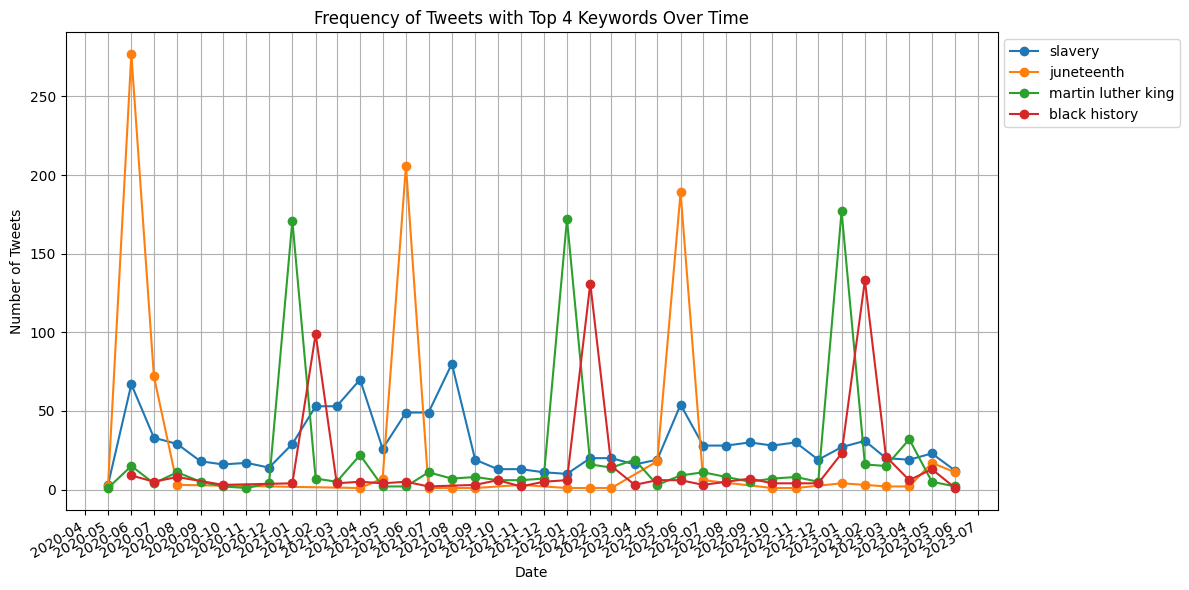

In [ ]:
title = 'Frequency of Tweets with Top 4 Keywords Over Time'
plt.figure(figsize=(12, 6))
plot_given_keywords(top_n_keywords(4))
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
unique_dates = keyword_count_monthly['date'].unique()
# plt.xticks(ticks=range(len(unique_dates)), labels=[str(date) for date in unique_dates], rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

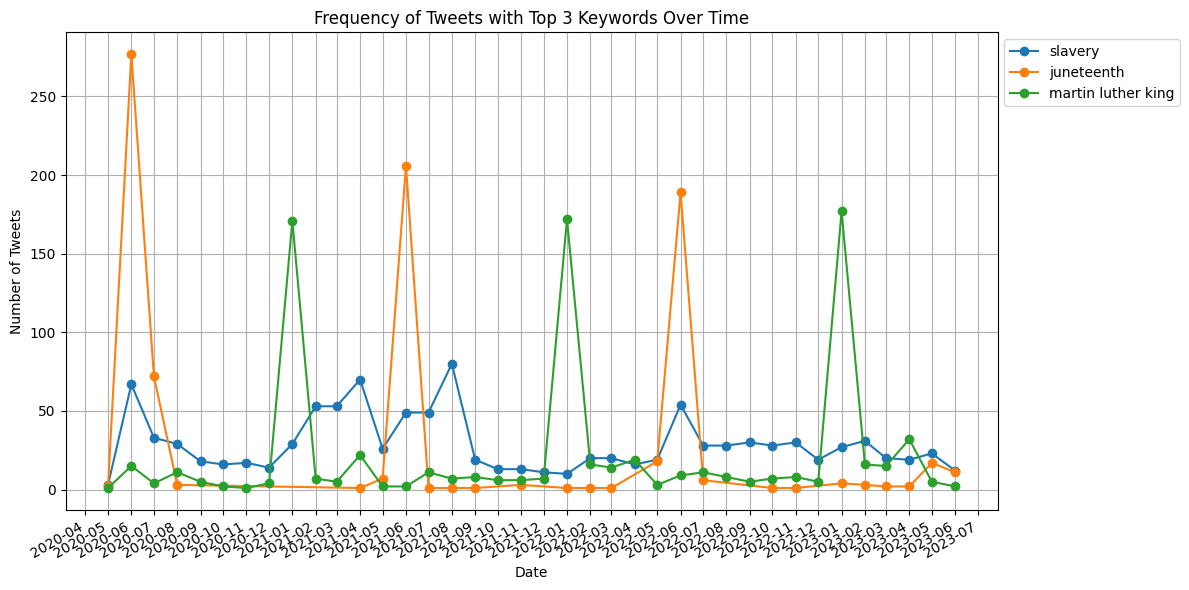

In [ ]:
title = 'Frequency of Tweets with Top 3 Keywords Over Time'
plt.figure(figsize=(12, 6))
plot_given_keywords(top_n_keywords(3))
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
unique_dates = keyword_count_monthly['date'].unique()
# plt.xticks(ticks=range(len(unique_dates)), labels=[str(date) for date in unique_dates], rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

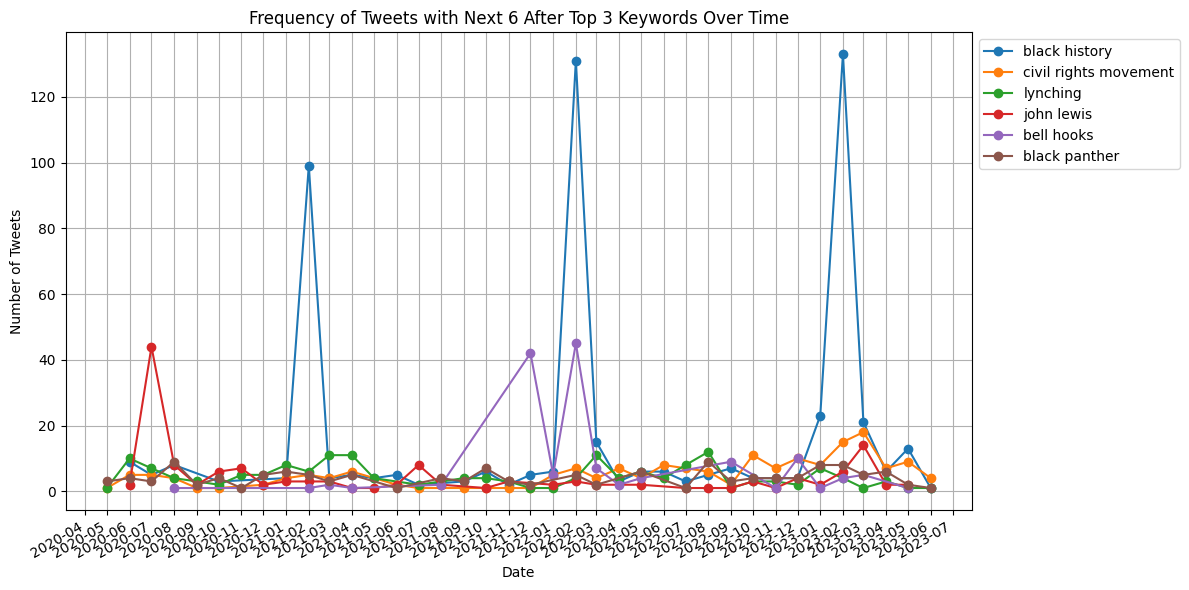

In [ ]:
title = 'Frequency of Tweets with Next 6 After Top 3 Keywords Over Time'
plt.figure(figsize=(12, 6))
plot_given_keywords(top_n_keywords(3+6)[3:])
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
unique_dates = keyword_count_monthly['date'].unique()
# plt.xticks(ticks=range(len(unique_dates)), labels=[str(date) for date in unique_dates], rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

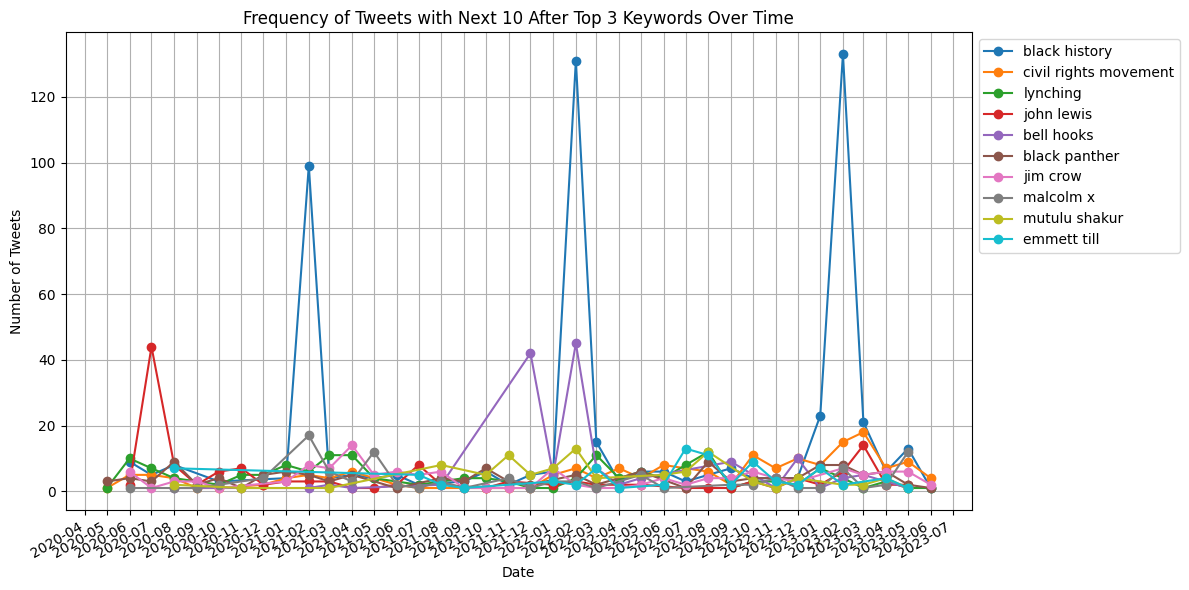

In [ ]:
title = 'Frequency of Tweets with Next 10 After Top 3 Keywords Over Time'
plt.figure(figsize=(12, 6))
plot_given_keywords(top_n_keywords(3+10)[3:])
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
unique_dates = keyword_count_monthly['date'].unique()
# plt.xticks(ticks=range(len(unique_dates)), labels=[str(date) for date in unique_dates], rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
# def plot_given_keywords(keywords, ax=plt):
#     for keyword in keywords:
#         keyword_data = keyword_count_monthly[keyword_count_monthly['keyword'] == keyword].copy()
#         keyword_data['date'] = keyword_data['date'].dt.to_timestamp()
#         keyword_data = keyword_data.sort_values('date')

#         ax.plot(
#             keyword_data['date'],
#             keyword_data['count'],
#             label=keyword,
#             marker='o'
#         )

#     # ax.set_xlabel('Date')
#     # ax.set_ylabel('Number of Tweets')
#     # ax.tick_params(axis='x', rotation=45)
#     # ax.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
#     # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#     ax.grid(True)

# fig, ax = plt.subplots(figsize=(12, 6))
# plot_given_keywords(top_n_keywords(10)[4:], ax)
# ax.set_xlabel("Date", fontweight='normal')
# ax.set_ylabel("Frequency")
# ax.set_title("Frequency of Keywords Ranked 4-10 Over Time")
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

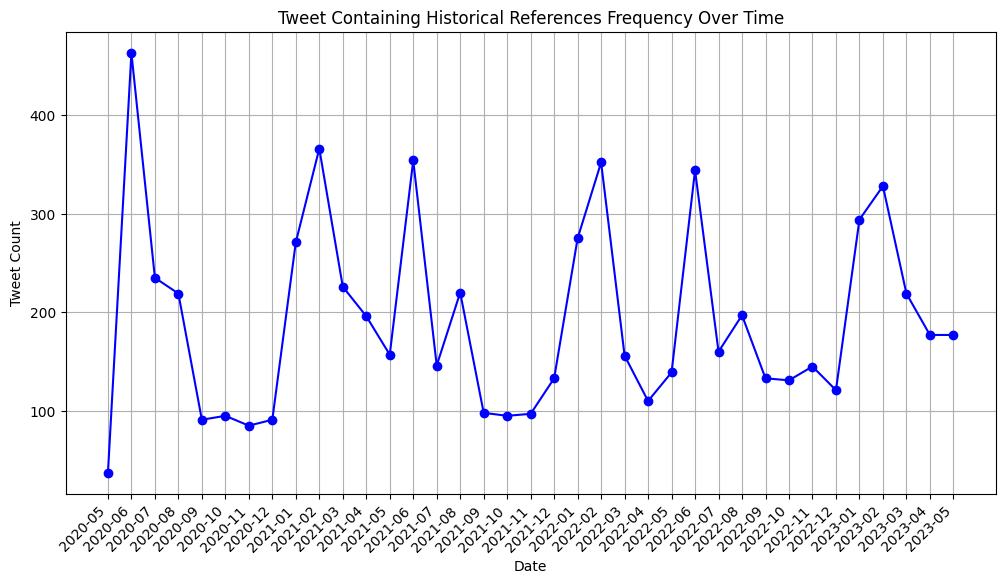

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is in a CSV file and has a column named 'created_at' for datetime
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset

data['created_at'] = pd.to_datetime(data['created_at'])

data['year_month'] = data['created_at'].dt.strftime('%Y-%m')

start_date = '2020-05'
end_date = '2023-05'
df_filtered = data[(data['year_month'] >= start_date) & (data['year_month'] <= end_date)]

tweet_frequency = df_filtered['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(tweet_frequency.index, tweet_frequency.values, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Tweet Containing Historical References Frequency Over Time')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## Creating visualizations of keyword frequency over time

In [ ]:
%%capture
!pip install vaderSentiment

In [ ]:
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
SentimentAnalyser = SentimentIntensityAnalyzer()
# function for calculating sentiment score
def sentiment_analyzer_score(tweet):
    sentiment_analyser = SentimentAnalyser
    score = sentiment_analyser.polarity_scores(tweet)
    return score

In [ ]:
data_including_sentiment = data.copy()

In [ ]:
data_including_sentiment["raw_text_sentiment"] = data_including_sentiment["raw_text"].apply(sentiment_analyzer_score)
data_including_sentiment["cleaned_text_sentiment"] = data_including_sentiment["cleaned_text"].apply(sentiment_analyzer_score)
data_including_sentiment[["raw_text_sentiment", "cleaned_text_sentiment"]].head()

,raw_text_sentiment,cleaned_text_sentiment
0,"{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'comp...","{'neg': 0.325, 'neu': 0.675, 'pos': 0.0, 'comp..."
1,"{'neg': 0.17, 'neu': 0.796, 'pos': 0.033, 'com...","{'neg': 0.255, 'neu': 0.695, 'pos': 0.05, 'com..."
2,"{'neg': 0.116, 'neu': 0.778, 'pos': 0.106, 'co...","{'neg': 0.183, 'neu': 0.65, 'pos': 0.167, 'com..."
3,"{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...","{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp..."
4,"{'neg': 0.289, 'neu': 0.619, 'pos': 0.092, 'co...","{'neg': 0.36, 'neu': 0.524, 'pos': 0.117, 'com..."


In [ ]:
raw_text_sentiment = data_including_sentiment["raw_text_sentiment"].apply(pd.Series)
cleaned_text_sentiment = data_including_sentiment["cleaned_text_sentiment"].apply(pd.Series)
data_including_sentiment = pd.concat([data_including_sentiment, ((raw_text_sentiment + cleaned_text_sentiment)/2)], axis=1)
del data_including_sentiment["raw_text_sentiment"]
del data_including_sentiment["cleaned_text_sentiment"]
data_including_sentiment.head()

,raw_text,created_at,id,retweet_count,reply_count,like_count,quote_count,bookmark_count,impression_count,account_id,cleaned_text,identified_keywords,year_month,neg,neu,pos,compound
0,"As we mourn the loss of Rep. John Lewis, we mu...",2020-07-22 17:54:09,1285996571503529984,1,0,0,0,0,0,1013890285523296258,mourn loss rep john lewis must also recommit a...,[john lewis],2020-07,0.2585,0.7415,0.0000,-0.80975
1,This false narrative around voter fraud isn't ...,2020-08-13 19:53:03,1293999023054097920,0,0,1,0,0,0,1013890285523296258,false narrative around voter fraud anything ne...,[civil war],2020-08,0.2125,0.7455,0.0415,-0.80200
2,"52 years after his murder, the words, &amp; wi...",2021-01-18 18:01:03,1351228121597554944,1,0,1,0,0,0,1013890285523296258,52 years murder words amp wisdom dr martin lut...,"[martin luther king, dr. king]",2021-01,0.1495,0.7140,0.1365,-0.15310
3,Say it loud: I’m BLACK and I’m PROUD! For this...,2021-02-16 16:00:35,1361707051550966016,0,0,0,0,0,0,1013890285523296258,say loud im black im proud black historyblack ...,[black history],2021-02,0.0000,0.8345,0.1655,0.56915
4,"For generations, racial terror has been used a...",2021-03-31 01:37:02,1377072413968630016,1,0,3,0,0,0,1013890285523296258,generations racial terror used weapon keep com...,[racial terror],2021-03,0.3245,0.5715,0.1045,-0.88450


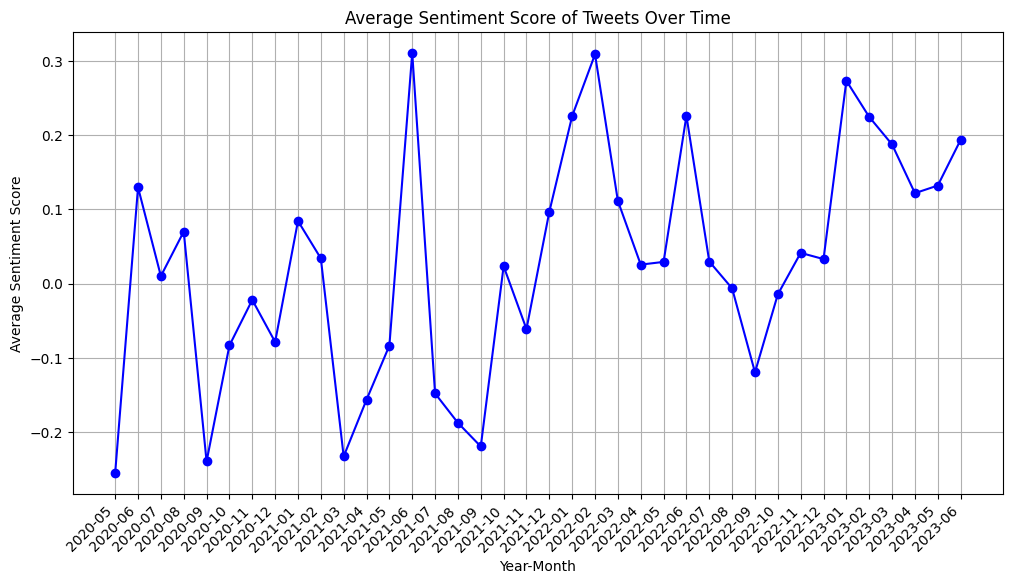

In [ ]:
average_sentiment = data_including_sentiment.groupby('year_month')['compound'].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_sentiment.index, average_sentiment.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year-Month')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score of Tweets Over Time')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [ ]:
def plot_sentiment_given_keyword(keyword, ax=plt):
  keyword_data_including_sentiment = data_including_sentiment[data_including_sentiment['identified_keywords'].apply(lambda x: keyword in x)]
  average_sentiment_keyword = keyword_data_including_sentiment.groupby('year_month')['compound'].mean()
  ax.figure(figsize=(12, 6))
  ax.plot(average_sentiment_keyword.index, average_sentiment_keyword.values, marker='o', linestyle='-', color='b')
  ax.xlabel('Year-Month')
  ax.ylabel('Average Sentiment Score')
  ax.xticks(rotation=45, ha='right')
  ax.grid(True)

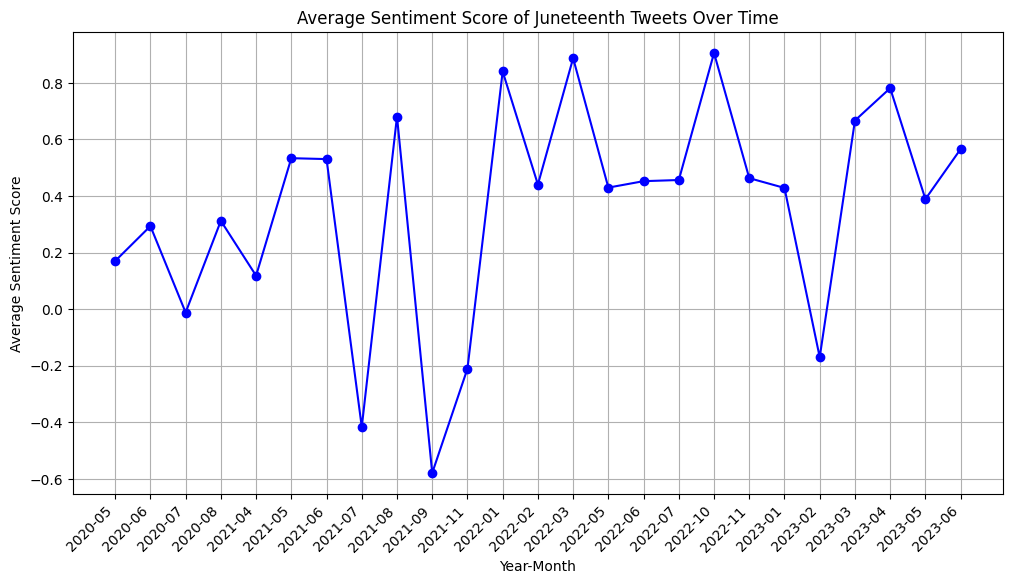

In [ ]:
plot_sentiment_given_keyword('juneteenth')
plt.title('Average Sentiment Score of Juneteenth Tweets Over Time')
plt.show()

In [ ]:
def replace_keyword_in_list(keywords_list, old_keyword, new_keyword):
  """Replaces occurrences of old_keyword with new_keyword in a list of keywords."""
  return list(set([new_keyword if keyword == old_keyword else keyword for keyword in keywords_list]))

In [ ]:
replacements = [('mlk','martin luther king'),
 ('dr. king','martin luther king'),
  ('enslaved','slavery'),
   ('slave ','slavery'),
    ('ku klux klan','kkk'),
     ('emmett louis till','emmett till')]

for replacement in replacements:
  data_including_sentiment['identified_keywords'] = [
      replace_keyword_in_list(keywords, *replacement)
      for keywords in data_including_sentiment['identified_keywords']
      ]
data_including_sentiment.head()

,raw_text,created_at,id,retweet_count,reply_count,like_count,quote_count,bookmark_count,impression_count,account_id,cleaned_text,identified_keywords,year_month,neg,neu,pos,compound
0,"As we mourn the loss of Rep. John Lewis, we mu...",2020-07-22 17:54:09,1285996571503529984,1,0,0,0,0,0,1013890285523296258,mourn loss rep john lewis must also recommit a...,[john lewis],2020-07,0.2585,0.7415,0.0000,-0.80975
1,This false narrative around voter fraud isn't ...,2020-08-13 19:53:03,1293999023054097920,0,0,1,0,0,0,1013890285523296258,false narrative around voter fraud anything ne...,[civil war],2020-08,0.2125,0.7455,0.0415,-0.80200
2,"52 years after his murder, the words, &amp; wi...",2021-01-18 18:01:03,1351228121597554944,1,0,1,0,0,0,1013890285523296258,52 years murder words amp wisdom dr martin lut...,[martin luther king],2021-01,0.1495,0.7140,0.1365,-0.15310
3,Say it loud: I’m BLACK and I’m PROUD! For this...,2021-02-16 16:00:35,1361707051550966016,0,0,0,0,0,0,1013890285523296258,say loud im black im proud black historyblack ...,[black history],2021-02,0.0000,0.8345,0.1655,0.56915
4,"For generations, racial terror has been used a...",2021-03-31 01:37:02,1377072413968630016,1,0,3,0,0,0,1013890285523296258,generations racial terror used weapon keep com...,[racial terror],2021-03,0.3245,0.5715,0.1045,-0.88450


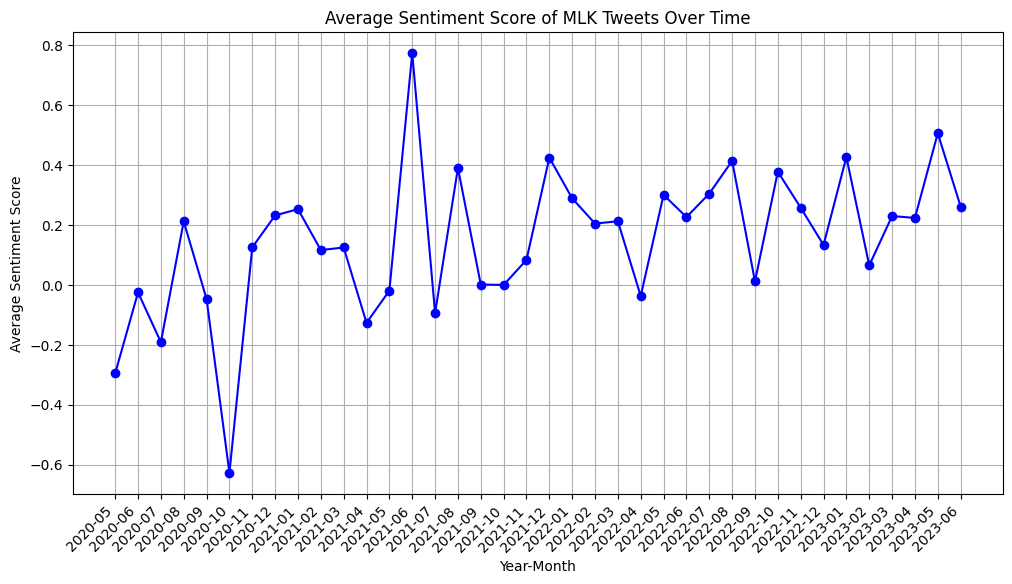

In [ ]:
plot_sentiment_given_keyword('martin luther king')
plt.title('Average Sentiment Score of MLK Tweets Over Time')
plt.show()

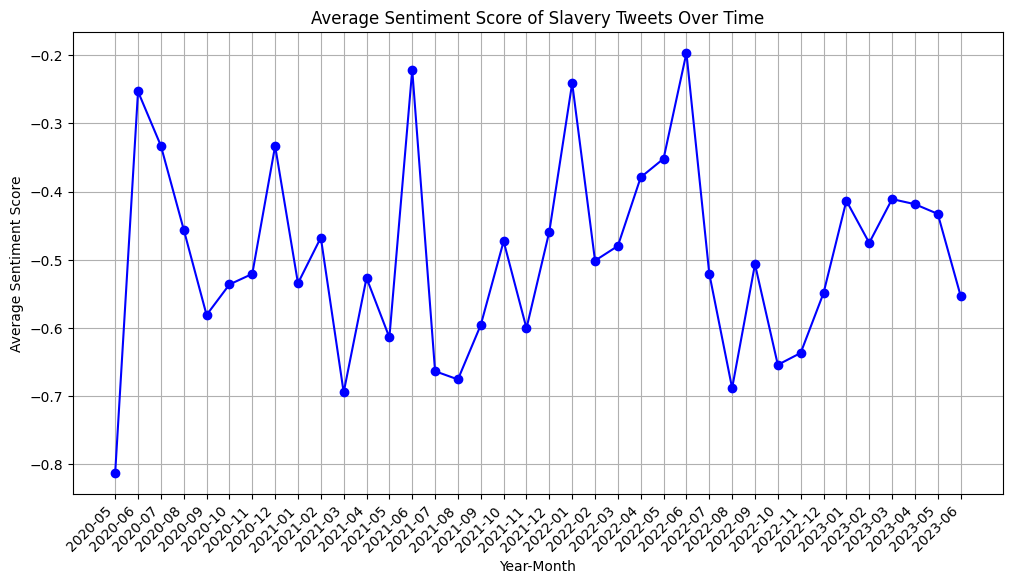

In [ ]:
plot_sentiment_given_keyword('slavery')
plt.title('Average Sentiment Score of Slavery Tweets Over Time')
plt.show()

In [ ]:
def compare_keyword_sentiments(keywords, ax):
  for keyword in keywords:
    data_keyword = data_including_sentiment[
        data_including_sentiment['identified_keywords'].apply(lambda x: keyword in x)
    ]
    sentiment_keyword = data_keyword.groupby('year_month')['compound'].mean().sort_index()

    sentiment_keyword.index = pd.to_datetime(sentiment_keyword.index, format='%Y-%m')
    ax.plot(
        sentiment_keyword.index,
        sentiment_keyword.values,
        marker='o', linestyle='-', label=keyword
    )
  ax.set_xlabel('Year-Month')
  ax.set_ylabel('Average Sentiment Score')
  ax.tick_params(axis='x', rotation=45)
  ax.grid(True)

In [ ]:
def get_sentiment_label(sentiment):
  return (
      'neg' if sentiment < -0.3 else
      'pos' if sentiment > 0.3 else
      'neu'
  )

### Save sentiments to df

In [ ]:
data_including_sentiment['sentiment'] = data_including_sentiment['compound'].apply(get_sentiment_label)
sentiment_labeled_tweets =  data_including_sentiment[['raw_text','cleaned_text','account_id', 'pos', 'neg', 'neu','compound','sentiment']].copy()
sentiment_labeled_tweets.to_excel('drive/MyDrive/F24 Research/data/sentiment_labeled_tweets.xlsx')

In [ ]:
def filter_df_by_keyword(keyword):
  return data_including_sentiment[
      [keyword in
       identified_keywords_list for
       identified_keywords_list in
       data_including_sentiment['identified_keywords']]
      ]

In [ ]:
import re
keyword_list = set([keyword for identified_keywords_list in data_including_sentiment['identified_keywords'] for keyword in identified_keywords_list])
average_sentiment_per_keyword = pd.DataFrame(keyword_list, columns=['keyword'])
average_sentiment_per_keyword['average_sentiment'] = average_sentiment_per_keyword['keyword'].apply(lambda x: filter_df_by_keyword(x)['compound'].mean())
average_sentiment_per_keyword['sentiment_label'] = average_sentiment_per_keyword['average_sentiment'].apply(get_sentiment_label)
average_sentiment_per_keyword = average_sentiment_per_keyword.set_index("keyword")
average_sentiment_per_keyword = average_sentiment_per_keyword.sort_index()
indices_to_drop = [
    idx for idx in average_sentiment_per_keyword.index
    if 'day' in idx or 'years' in idx or bool(re.search(r'\b\d{4}\b', idx)) or bool(re.search(r'day', idx))
    ]
average_sentiment_per_keyword_cleaned = average_sentiment_per_keyword.drop(indices_to_drop)
average_sentiment_per_keyword = average_sentiment_per_keyword_cleaned
average_sentiment_per_keyword_cleaned.to_excel('drive/MyDrive/F24 Research/data/average_sentiment_per_keyword.xlsx')

## Calculate cosine similarity of sentiments

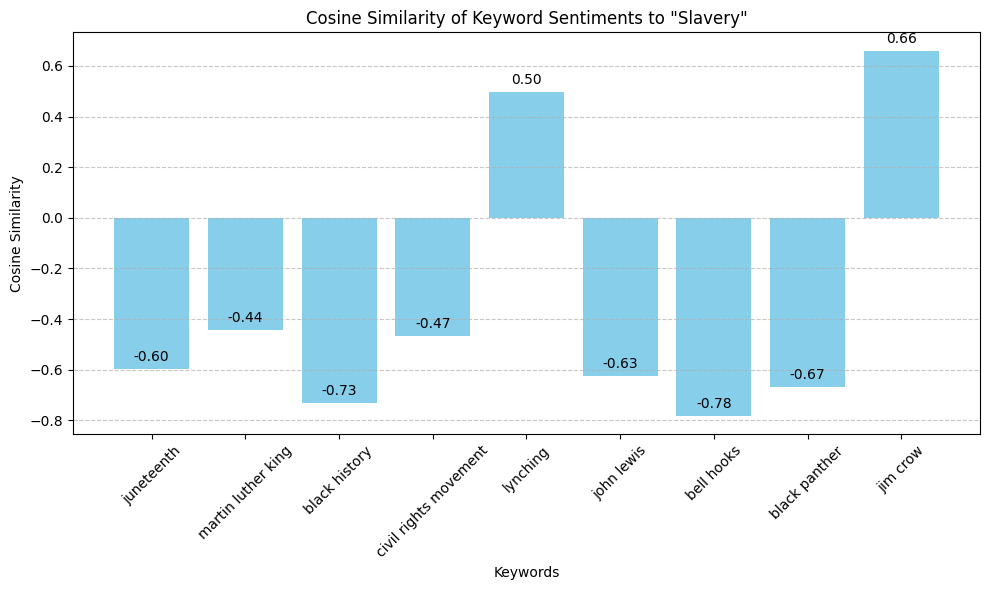

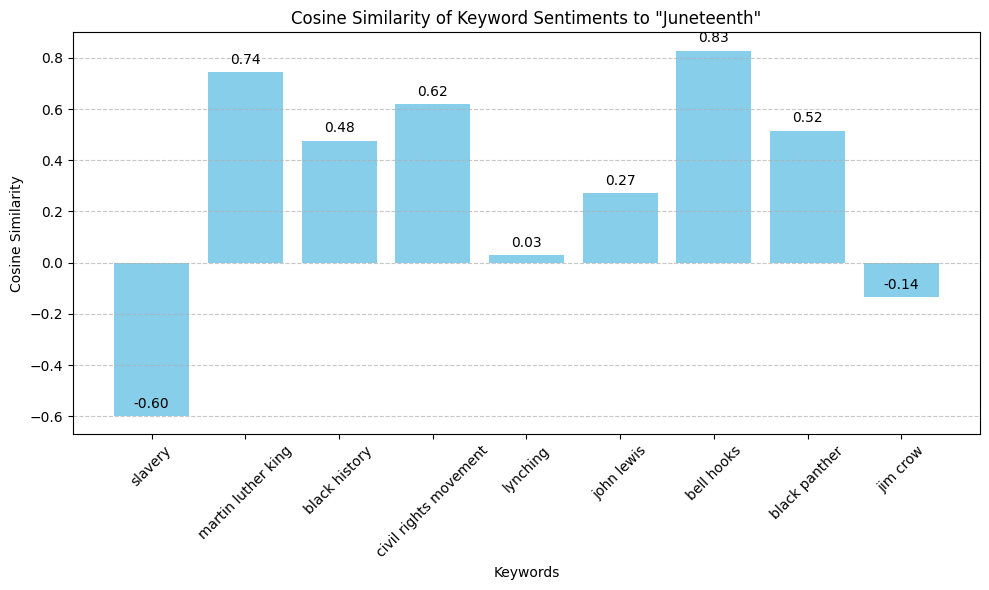

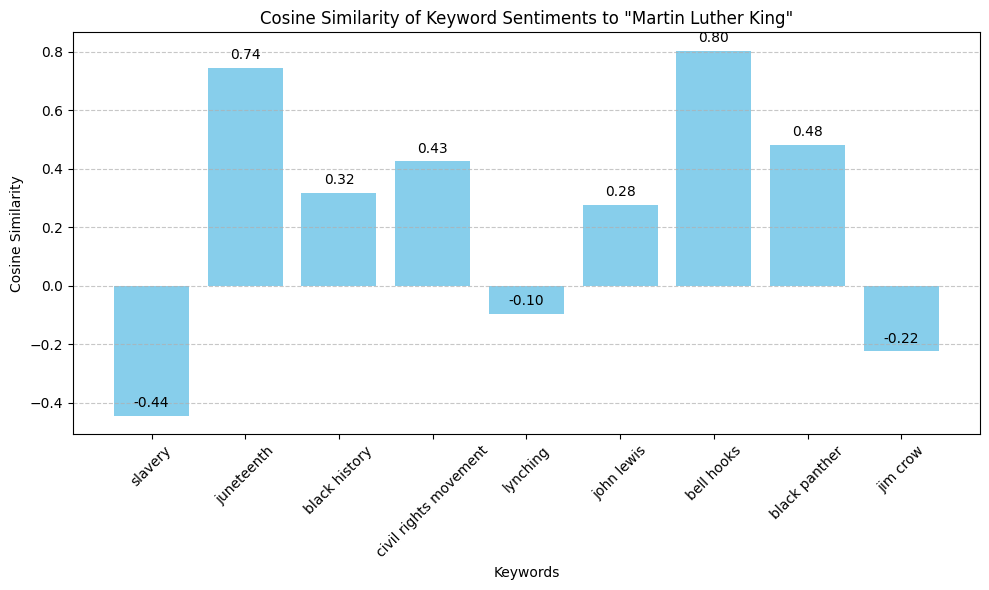

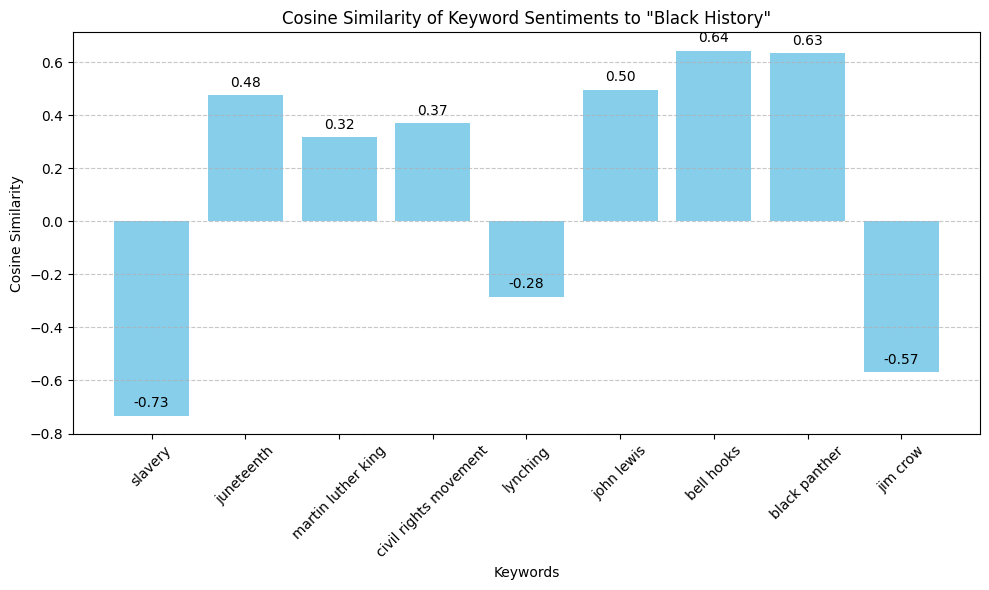

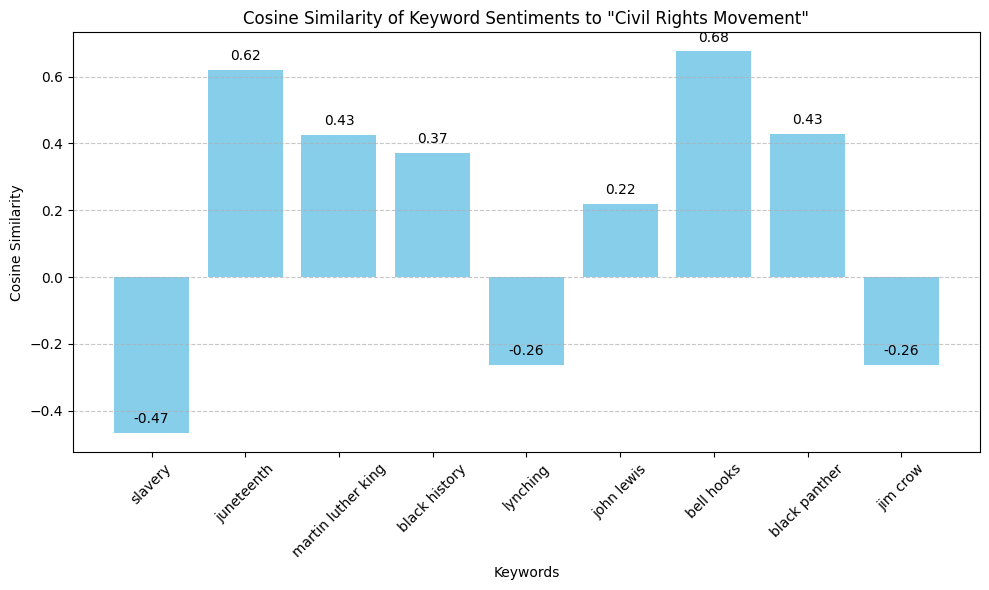

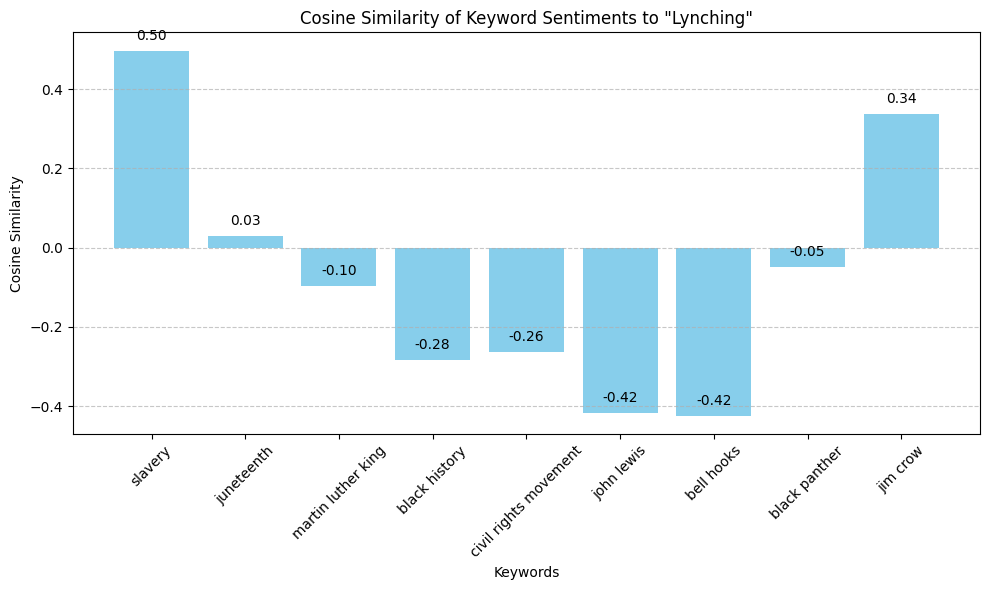

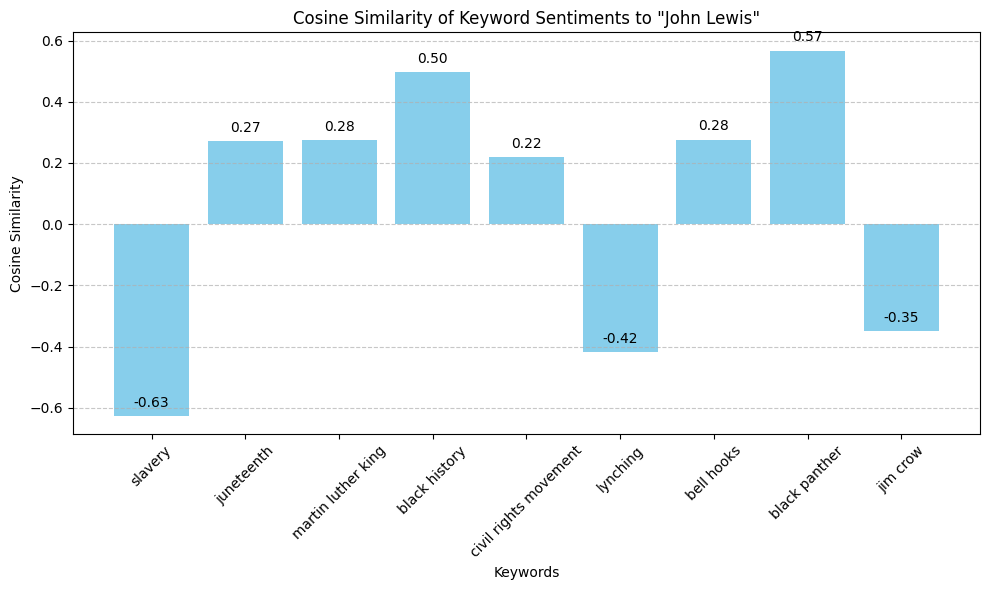

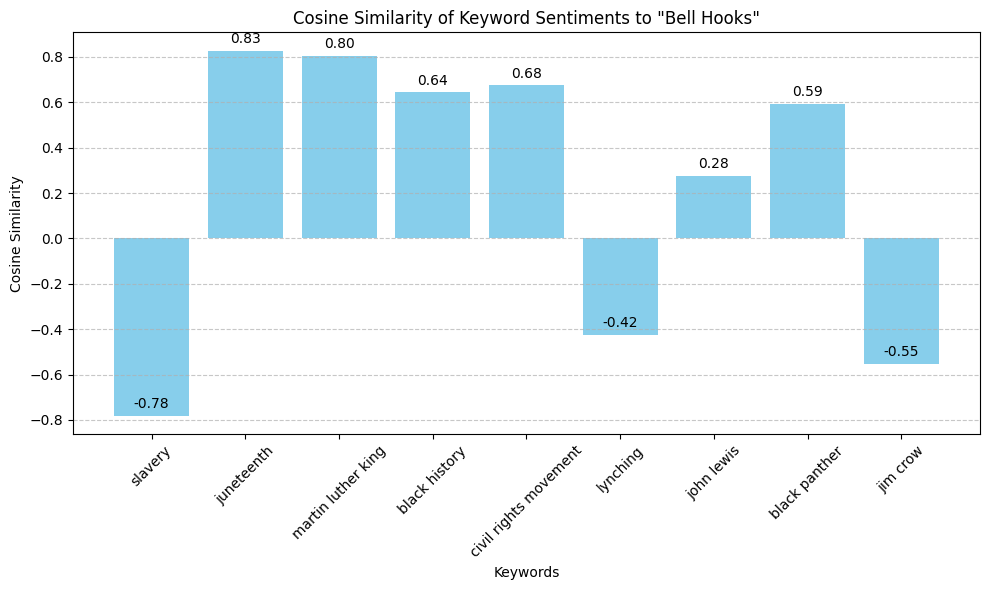

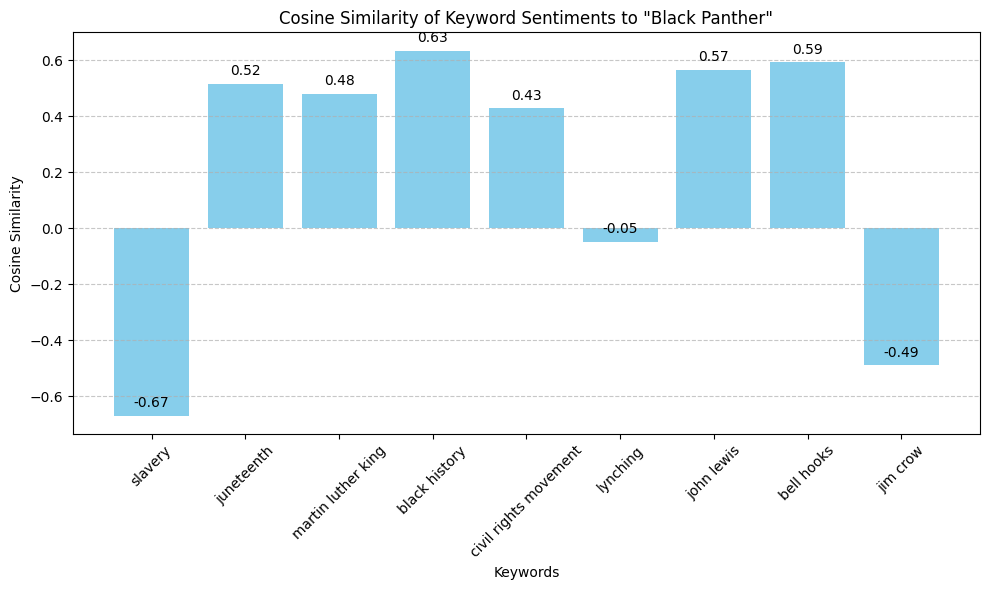

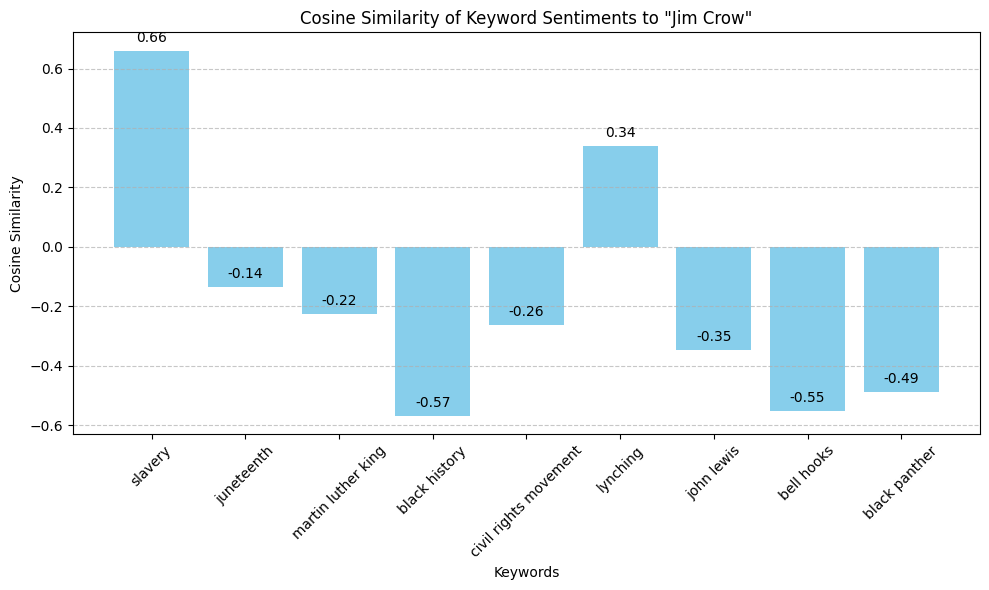

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

def calculate_keyword_cosine_similarity(target_keyword, keywords, data_including_sentiment):
    # Create a dictionary to store cosine similarities
    cosine_similarities = {}

    # Extract sentiment for the target keyword
    target_data = data_including_sentiment[
        data_including_sentiment['identified_keywords'].apply(lambda x: target_keyword in x)
    ]
    target_sentiment = target_data.groupby('year_month')['compound'].mean().sort_index()
    target_sentiment.index = pd.to_datetime(target_sentiment.index, format='%Y-%m')

    # Calculate cosine similarity with each other keyword
    for other_keyword in keywords:
        if other_keyword == target_keyword:
            continue

        # Extract sentiment for the other keyword
        other_data = data_including_sentiment[
            data_including_sentiment['identified_keywords'].apply(lambda x: other_keyword in x)
        ]
        other_sentiment = other_data.groupby('year_month')['compound'].mean().sort_index()
        other_sentiment.index = pd.to_datetime(other_sentiment.index, format='%Y-%m')

        # Find common timestamps
        common_timestamps = sorted(set(target_sentiment.index) & set(other_sentiment.index))
        if not common_timestamps:
            cosine_similarities[other_keyword] = np.nan  # No common data points
            continue

        # Align sentiment values by common timestamps
        target_values = [target_sentiment[timestamp] for timestamp in common_timestamps]
        other_values = [other_sentiment[timestamp] for timestamp in common_timestamps]

        # Calculate cosine similarity
        cosine_sim = cosine_similarity([target_values], [other_values])[0][0]
        cosine_similarities[other_keyword] = cosine_sim

    return cosine_similarities

def plot_keyword_cosine_similarity(target_keyword, keywords, data_including_sentiment):
    # Calculate cosine similarities
    cosine_similarities = calculate_keyword_cosine_similarity(target_keyword, keywords, data_including_sentiment)

    # Prepare data for plotting
    labels = list(cosine_similarities.keys())
    values = list(cosine_similarities.values())
    title = str(' '.join([x.capitalize() for x in target_keyword.split(" ")]))

    # Plot the cosine similarities as a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Keywords')
    plt.ylabel('Cosine Similarity')
    plt.title(f'Cosine Similarity of Keyword Sentiments to "{title}"')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the similarity scores on top of each bar
    for i, value in enumerate(values):
        plt.text(i, value + 0.02, f"{value:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


top_10_keywords = top_n_keywords(10)
for target_keyword in top_10_keywords:
  plot_keyword_cosine_similarity(target_keyword, top_10_keywords, data_including_sentiment)


## Calculate cosine similarity of normalized counts

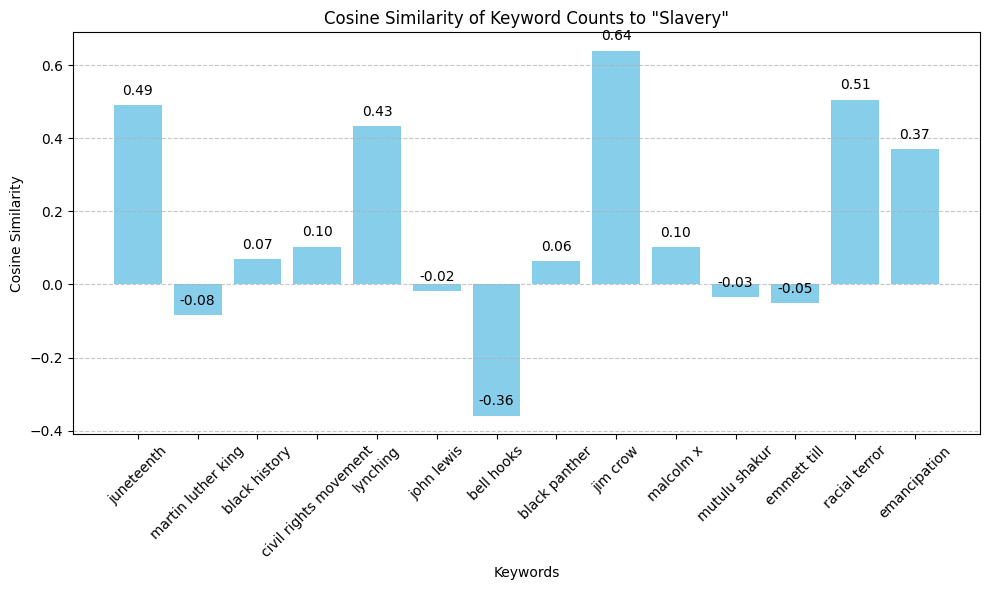

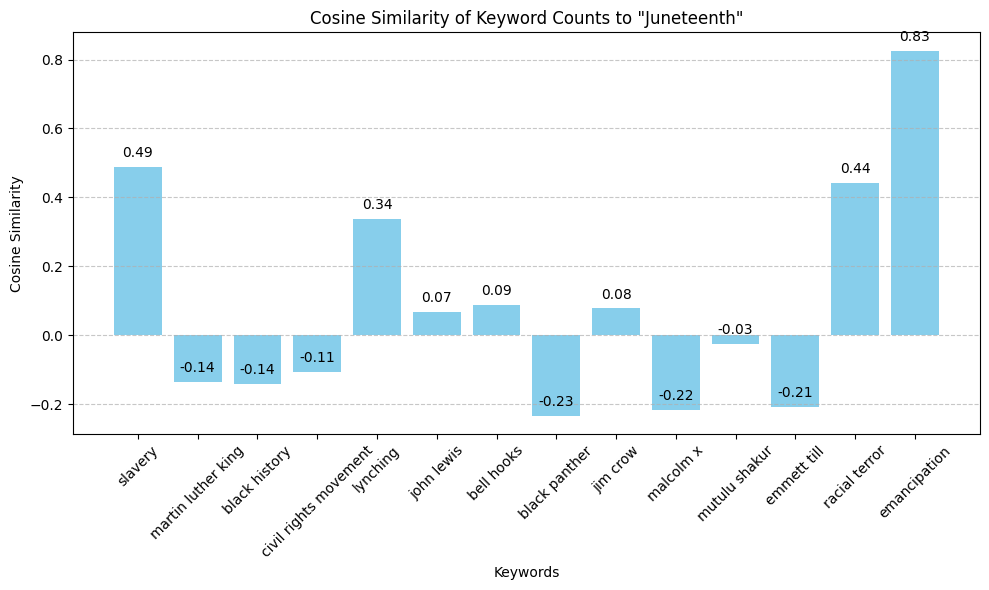

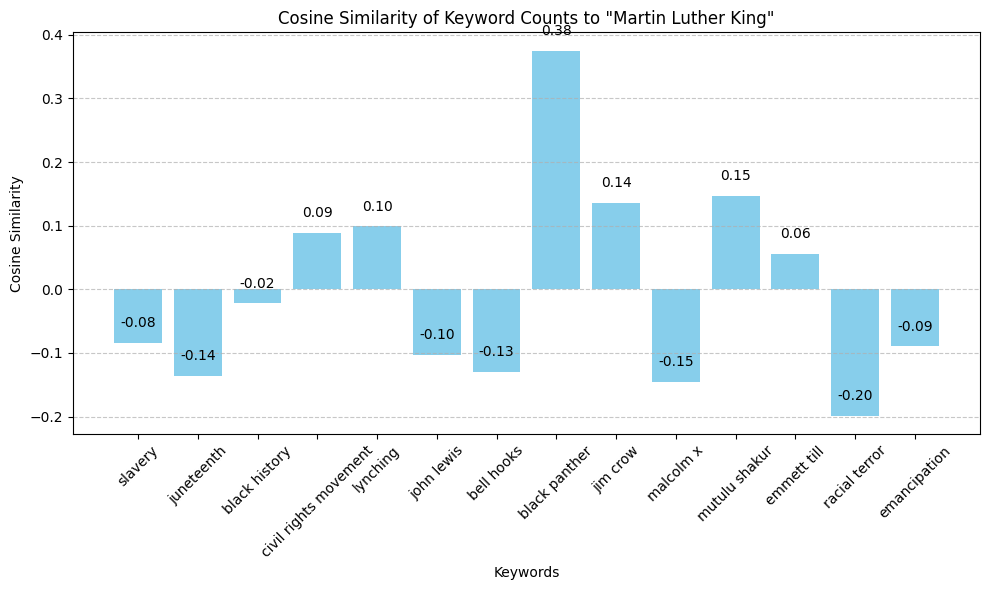

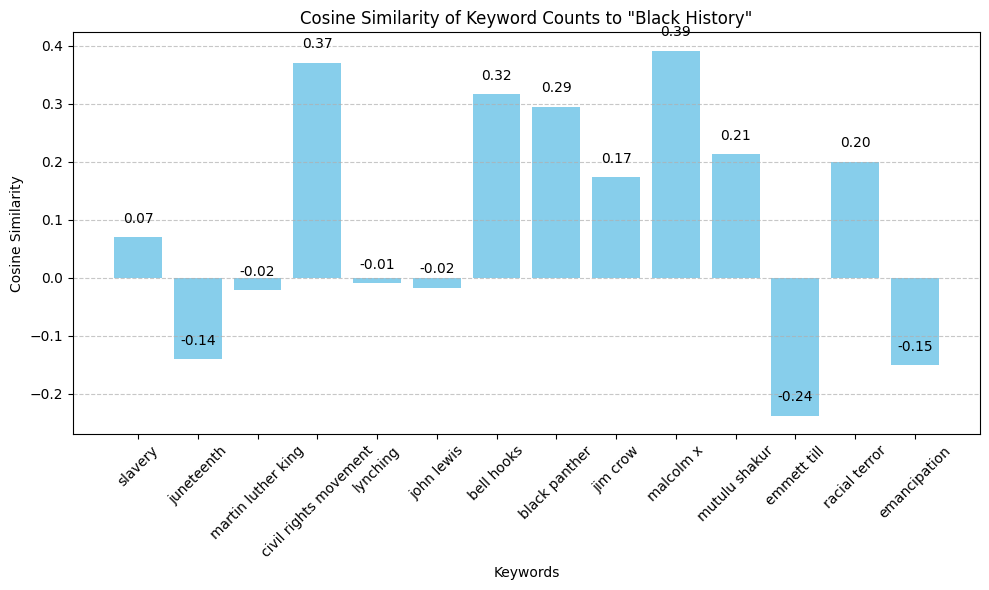

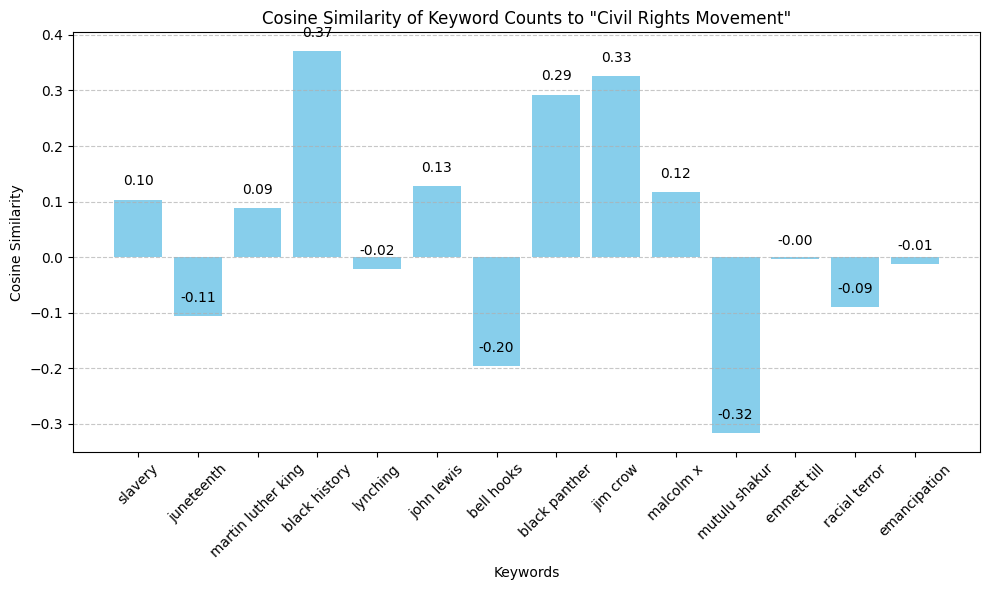

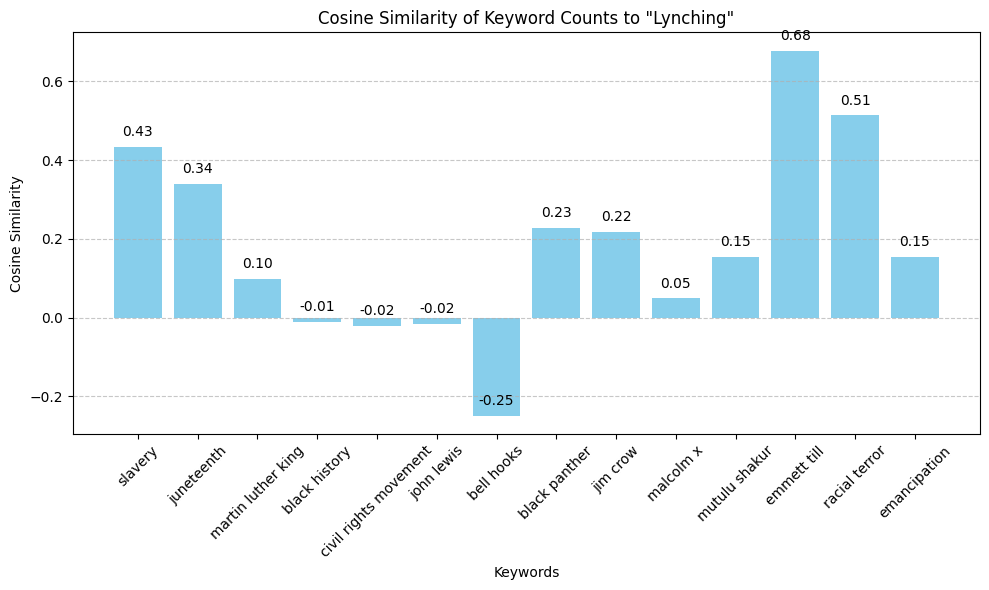

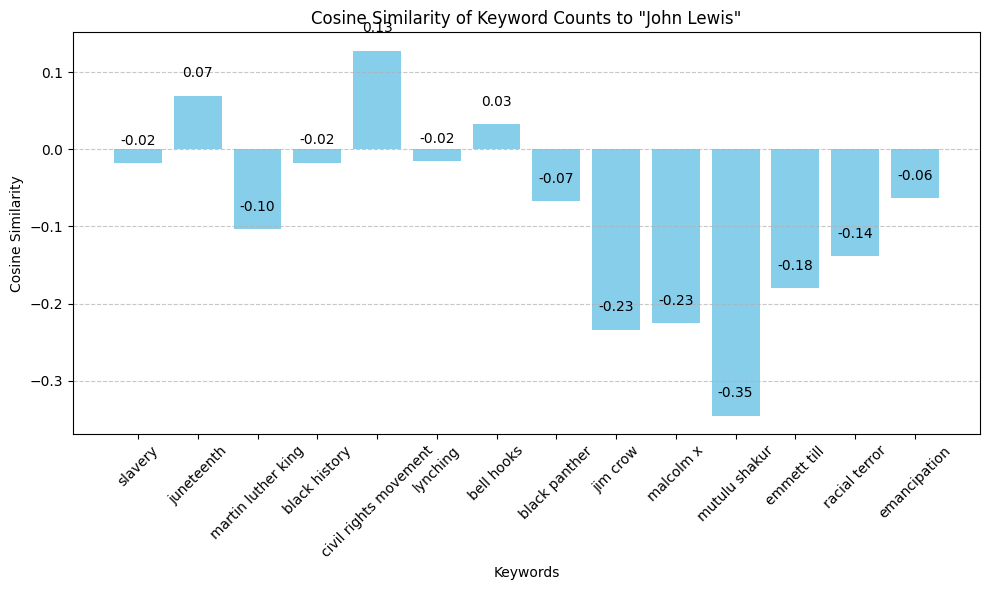

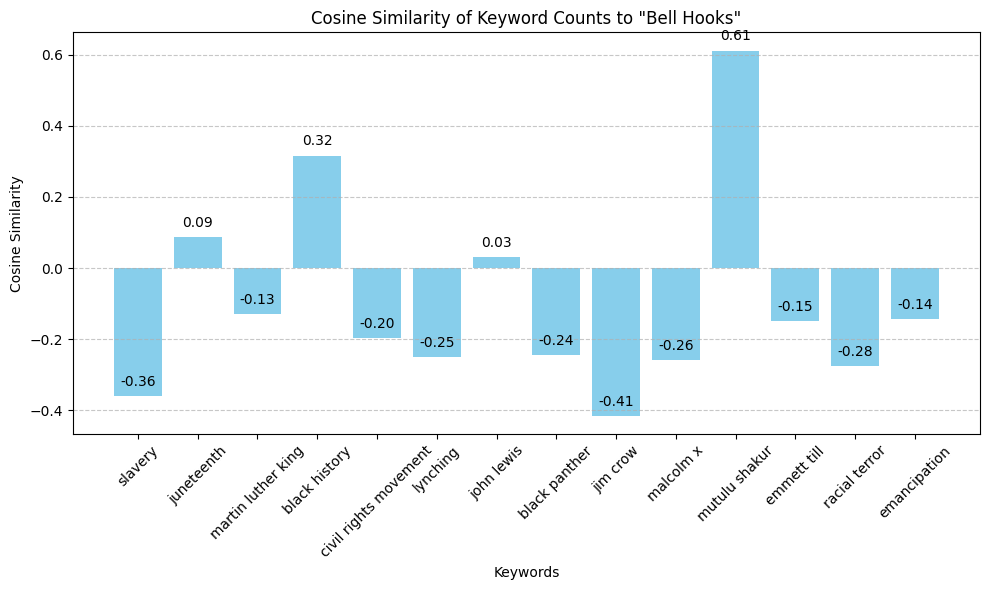

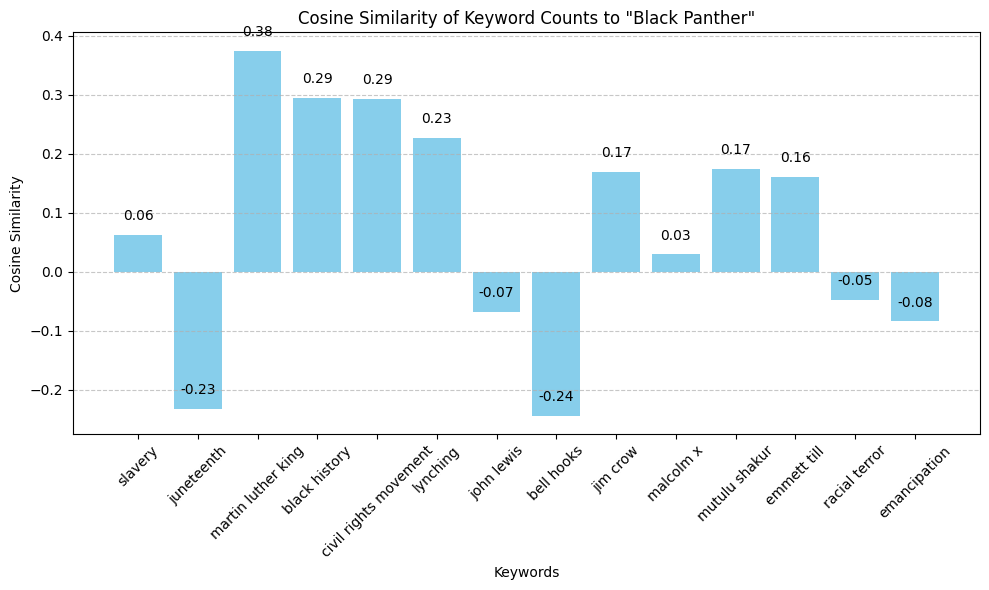

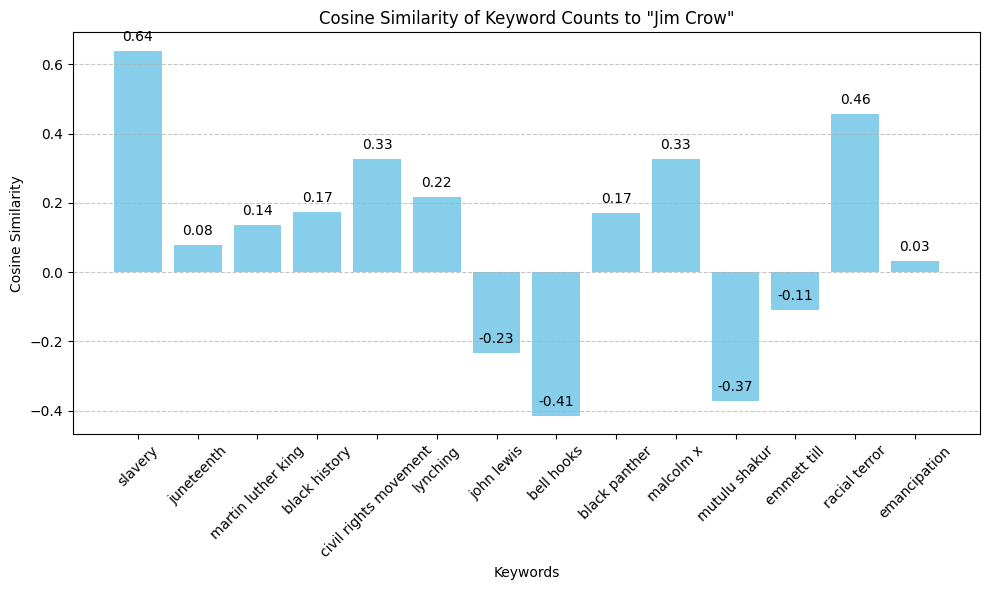

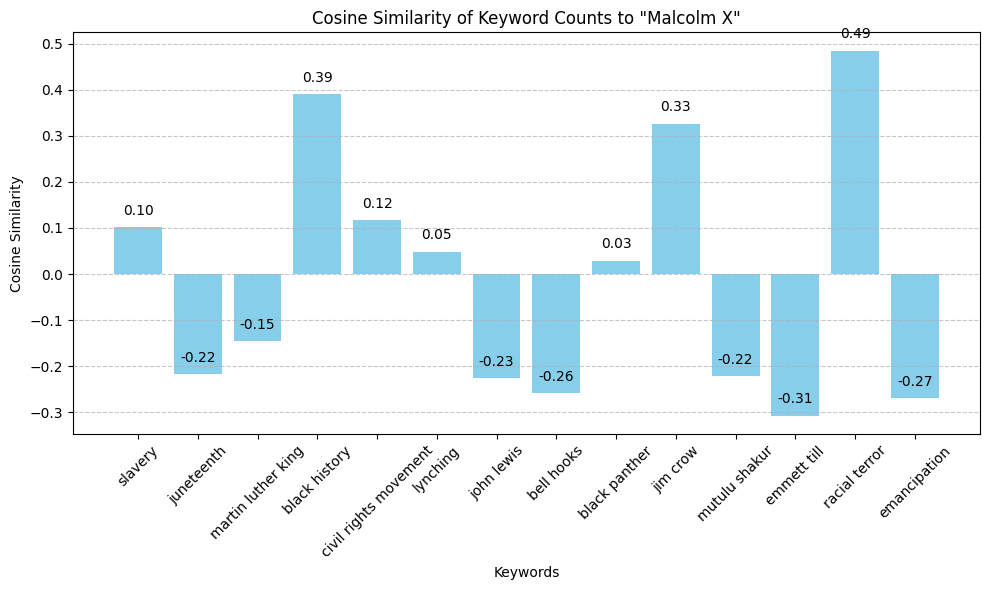

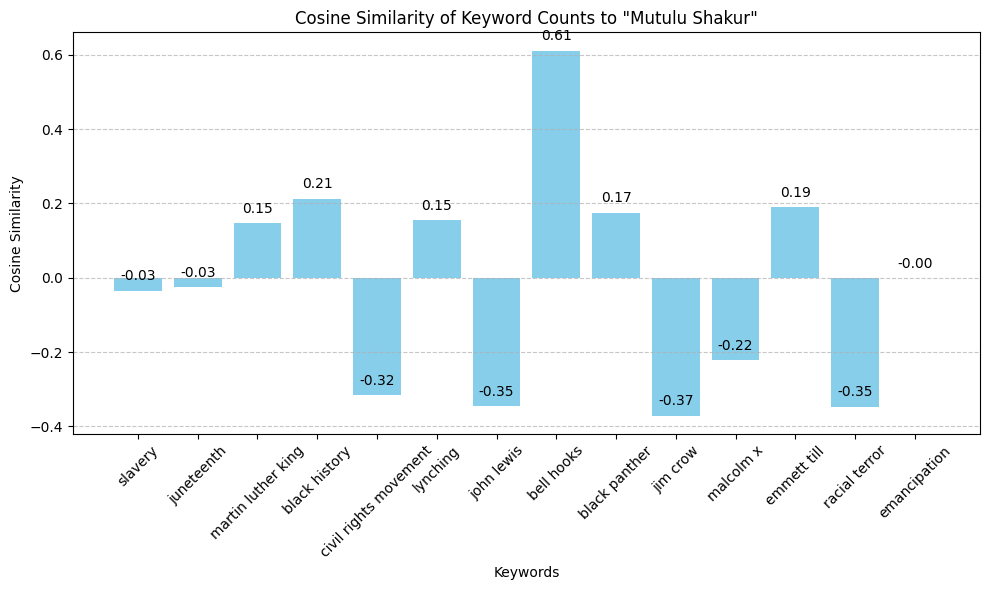

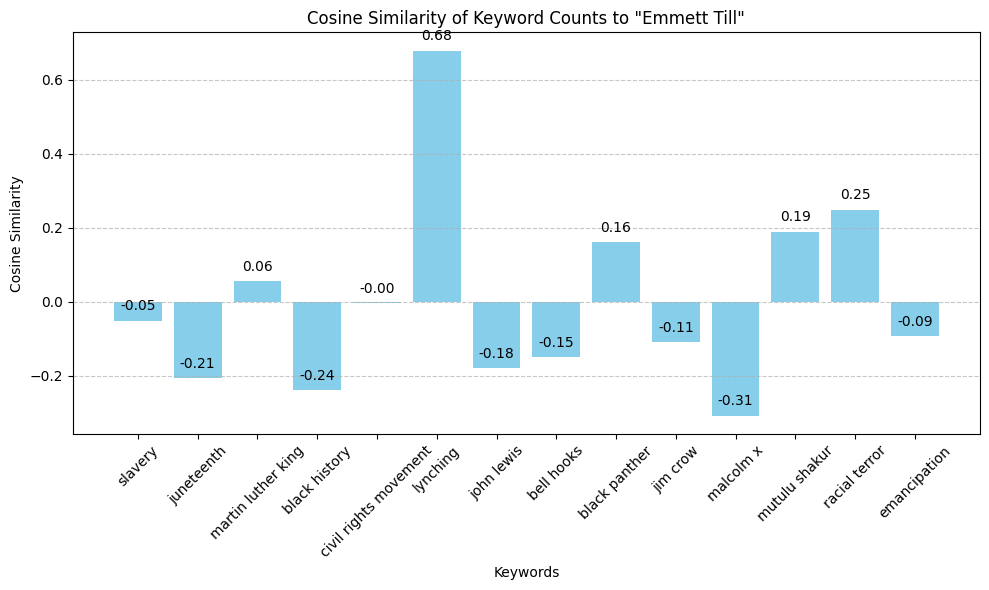

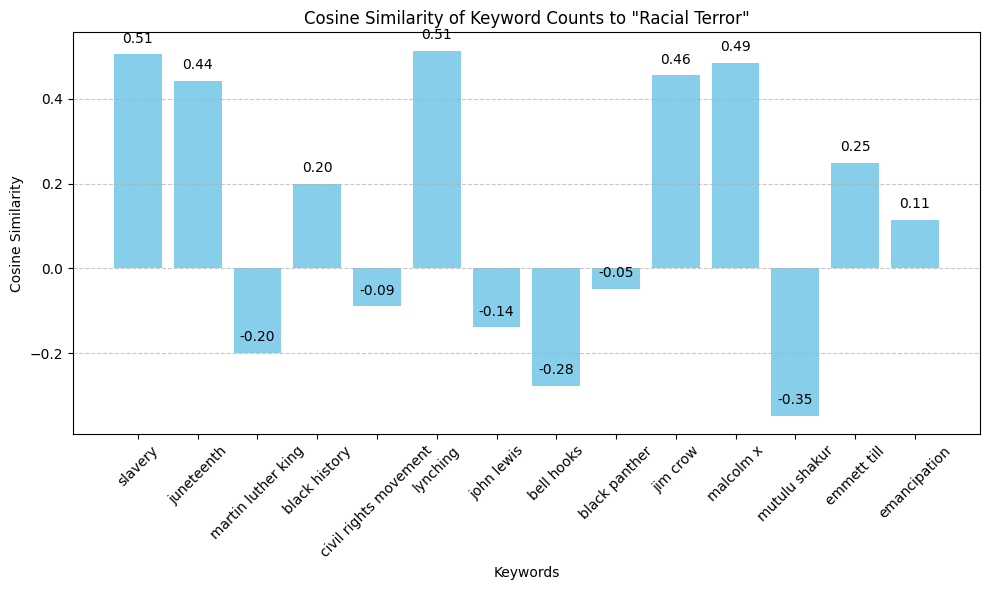

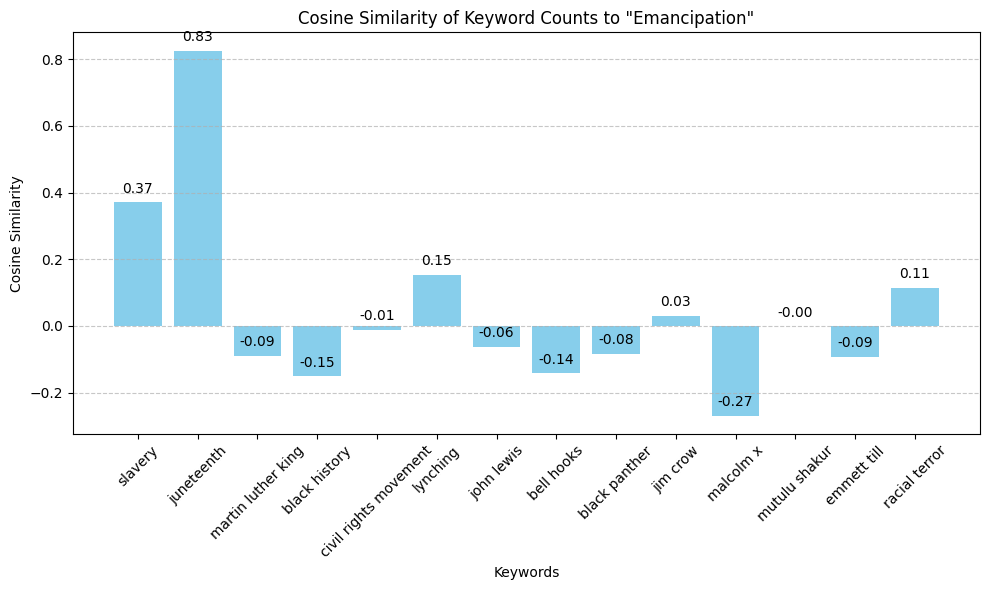

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np

# scaler = MinMaxScaler()
scaler = StandardScaler()

def calculate_keyword_count_cosine_similarity(target_keyword, keywords, keyword_count_monthly):
    # Create a dictionary to store cosine similarities
    cosine_similarities = {}

    target_data = keyword_count_monthly[
        keyword_count_monthly['keyword'].apply(lambda x: target_keyword in x)
    ][['date','count']].copy()
    target_data['count_scaled'] = scaler.fit_transform(target_data[['count']])
    target_data = target_data.set_index('date')


    # Calculate cosine similarity with each other keyword count
    for other_keyword in keywords:
        if other_keyword == target_keyword:
            continue

        other_data = keyword_count_monthly[
            keyword_count_monthly['keyword'].apply(lambda x: other_keyword in x)
        ][['date','count']].copy()
        other_data['count_scaled'] = scaler.fit_transform(other_data[['count']])
        other_data = other_data.set_index('date')

        # Find common timestamps
        common_timestamps = sorted(set(target_data.index) & set(other_data.index))
        if not common_timestamps:
            cosine_similarities[other_keyword] = np.nan  # No common data points
            continue

        # Align sentiment values by common timestamps
        target_values = [target_data.loc[timestamp]['count_scaled'] for timestamp in common_timestamps]
        other_values = [other_data.loc[timestamp]['count_scaled'] for timestamp in common_timestamps]

        # Calculate cosine similarity
        cosine_sim = cosine_similarity([target_values], [other_values])[0][0]
        cosine_similarities[other_keyword] = cosine_sim

    return cosine_similarities

def plot_keyword_count_cosine_similarity(target_keyword, keywords, data_including_sentiment):
    # Calculate cosine similarities
    cosine_similarities = calculate_keyword_count_cosine_similarity(target_keyword, keywords, data_including_sentiment)

    # Prepare data for plotting
    labels = list(cosine_similarities.keys())
    values = list(cosine_similarities.values())
    title = str(' '.join([x.capitalize() for x in target_keyword.split(" ")]))

    # Plot the cosine similarities as a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Keywords')
    plt.ylabel('Cosine Similarity')
    plt.title(f'Cosine Similarity of Keyword Counts to "{title}"')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the similarity scores on top of each bar
    for i, value in enumerate(values):
        plt.text(i, value + 0.02, f"{value:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


top_10_keywords = top_n_keywords(15)
for target_keyword in top_10_keywords:
  plot_keyword_count_cosine_similarity(target_keyword, top_10_keywords, keyword_count_monthly)


## Calculate cosine similarity of normalized counts - historical vs. not

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()

In [ ]:
historical_data = pd.read_excel('drive/MyDrive/F24 Research/data/simplified_historical_tweets_no_exclusions.xlsx')
historical_data['identified_keywords'] = historical_data['identified_keywords'].apply(ast.literal_eval)
historical_data['created_at'] = pd.to_datetime(historical_data['created_at'])
historical_data['year_month'] = historical_data['created_at'].dt.strftime('%Y-%m')

not_historical_data = pd.read_excel('drive/MyDrive/F24 Research/data/simplified_cleaned_tweets.xlsx')
not_historical_data = pd.concat([historical_data, not_historical_data]).drop('identified_keywords', axis=1).drop_duplicates(keep=False)
# not_historical_data['identified_keywords'] = not_historical_data['identified_keywords'].apply(ast.literal_eval)
not_historical_data['created_at'] = pd.to_datetime(not_historical_data['created_at'])
not_historical_data['year_month'] = not_historical_data['created_at'].dt.strftime('%Y-%m')

In [ ]:
historical_counts_by_year_month = pd.DataFrame(historical_data.groupby('year_month').size().rename('count'))
historical_counts_by_year_month['count_scaled'] = scaler.fit_transform(historical_counts_by_year_month[['count']])

not_historical_counts_by_year_month = pd.DataFrame(not_historical_data.groupby('year_month').size().rename('count'))
not_historical_counts_by_year_month['count_scaled'] = scaler.fit_transform(not_historical_counts_by_year_month[['count']])


common_timestamps = sorted(set(historical_counts_by_year_month.index) & set(not_historical_counts_by_year_month.index))
target_values = [historical_counts_by_year_month.loc[timestamp]['count_scaled'] for timestamp in common_timestamps]
other_values = [not_historical_counts_by_year_month.loc[timestamp]['count_scaled'] for timestamp in common_timestamps]

cosine_sim = cosine_similarity([target_values], [other_values])[0][0]
cosine_sim

0.6286432396522994

## Were there more historical tweets, or were people simply tweeting more?

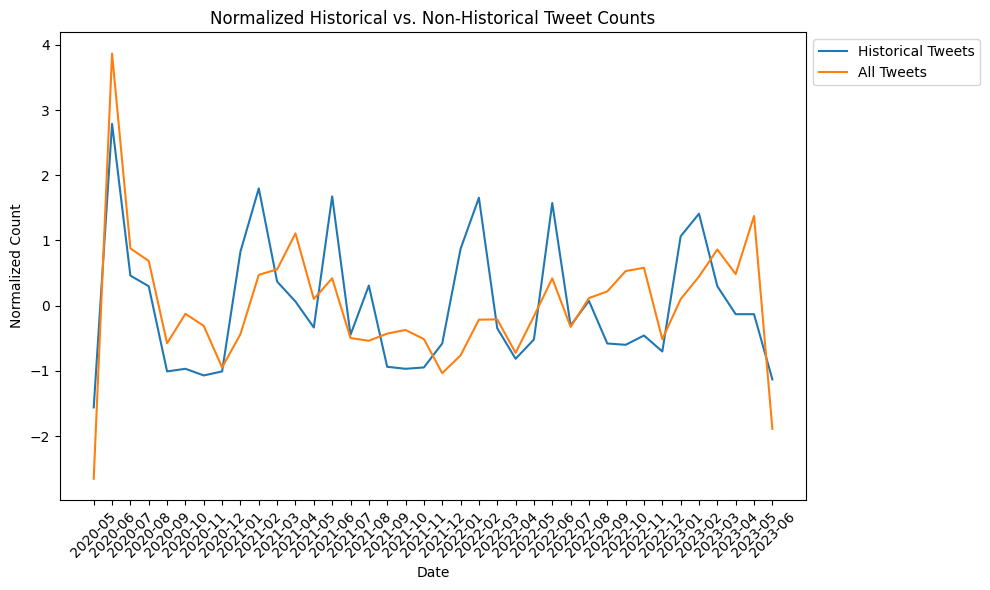

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(common_timestamps, historical_counts_by_year_month['count_scaled'], label='Historical Tweets')
plt.plot(common_timestamps, not_historical_counts_by_year_month['count_scaled'], label='All Tweets')
plt.xlabel('Date')
plt.ylabel('Normalized Count')
plt.title(f'Normalized Historical vs. Non-Historical Tweet Counts')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()